##### Imports

In [33]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


##### Data Loading

In [34]:
walking_df = pd.read_csv("data\MLG __ Data - walking.csv")
running_df = pd.read_csv("data\MLG __ Data - Running.csv")

C:\Users\Admin\AppData\Local\Temp\ipykernel_14952\596919512.py:1: DtypeWarning: Columns (5,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  walking_df = pd.read_csv("data\MLG __ Data - walking.csv")
C:\Users\Admin\AppData\Local\Temp\ipykernel_14952\596919512.py:2: DtypeWarning: Columns (5,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  running_df = pd.read_csv("data\MLG __ Data - Running.csv")


In [35]:
walking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120747 entries, 0 to 120746
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Experiment                     120363 non-null  float64
 1   Time (s)                       52862 non-null   object 
 2   Linear Acceleration x (m/s^2)  52862 non-null   object 
 3   Linear Acceleration y (m/s^2)  52862 non-null   object 
 4   Linear Acceleration z (m/s^2)  52862 non-null   object 
 5   Absolute acceleration (m/s^2)  30363 non-null   object 
 6   Time (s).1                     120658 non-null  object 
 7   Gyroscope x (rad/s)            120658 non-null  object 
 8   Gyroscope y (rad/s)            120658 non-null  object 
 9   Gyroscope z (rad/s)            120658 non-null  object 
 10  Absolute (rad/s)               30658 non-null   object 
 11  Label                          6070 non-null    object 
dtypes: float64(1), object(11)
memo

In [36]:
running_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120610 entries, 0 to 120609
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   experiment                     120562 non-null  float64
 1   Time (s)                       53058 non-null   object 
 2   Linear Acceleration x (m/s^2)  53058 non-null   object 
 3   Linear Acceleration y (m/s^2)  53058 non-null   object 
 4   Linear Acceleration z (m/s^2)  53058 non-null   object 
 5   Absolute acceleration (m/s^2)  30560 non-null   object 
 6   Time (s).1                     120515 non-null  object 
 7   Gyroscope x (rad/s)            120515 non-null  object 
 8   Gyroscope y (rad/s)            120515 non-null  object 
 9   Gyroscope z (rad/s)            120515 non-null  object 
 10  Absolute (rad/s)               30513 non-null   object 
 11  Label                          12269 non-null   object 
dtypes: float64(1), object(11)
memo

In [37]:
walking_df.head()

,Experiment,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2),Time (s).1,Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Absolute (rad/s),Label
0,1.0,"5,24E-03","6,36E-01","1,15E+00","-1,55E+00","2,03E+00","5,82E-03","-4,16E-01","-9,86E-01","-5,83E-01","1,22E+00",walking
1,1.0,"1,53E-02","2,69E-01","1,29E+00","-1,57E+00","2,05E+00","1,58E-02","-4,64E-01","-9,81E-01","-5,24E-01","1,21E+00",walking
2,1.0,"2,53E-02","1,36E-01","1,49E+00","-1,06E+00","1,83E+00","2,59E-02","-5,24E-01","-9,75E-01","-4,71E-01","1,20E+00",walking
3,1.0,"3,53E-02","-9,98E-02","1,55E+00","-3,90E-01","1,60E+00","3,59E-02","-5,81E-01","-9,01E-01","-4,26E-01","1,15E+00",walking
4,1.0,"4,53E-02","-3,31E-01","1,46E+00","4,85E-01","1,57E+00","4,59E-02","-5,82E-01","-7,14E-01","-3,72E-01","9,94E-01",walking


In [38]:
running_df.head()

,experiment,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2),Time (s).1,Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Absolute (rad/s),Label
0,1.0,"4,25E-03","-2,47E+00","1,96E+00","-2,07E+00","3,77E+00","-2,49E-03","-2,74E-01","-5,30E-01","2,45E-01","6,45E-01",running
1,1.0,"1,43E-02","-2,76E+00","2,14E+00","-2,55E+00","4,32E+00","7,53E-03","-3,75E-01","-5,30E-01","2,89E-01","7,11E-01",running
2,1.0,"2,43E-02","-2,85E+00","2,41E+00","-2,96E+00","4,77E+00","1,75E-02","-4,80E-01","-4,58E-01","3,27E-01","7,40E-01",running
3,1.0,"3,43E-02","-2,79E+00","2,74E+00","-3,38E+00","5,17E+00","2,76E-02","-6,01E-01","-3,49E-01","3,45E-01","7,76E-01",running
4,1.0,"4,43E-02","-2,91E+00","2,91E+00","-3,59E+00","5,46E+00","3,76E-02","-7,39E-01","-2,25E-01","3,48E-01","8,47E-01",running


In [39]:
walking_df.describe()

,Experiment
count,120363.000000
mean,5.989307
std,2.007731
min,1.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,8.000000


In [40]:
running_df.describe()

,experiment
count,120562.000000
mean,5.984962
std,2.009734
min,1.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,8.000000


In [42]:
# Update clean function to handle lowercase column name variation
def clean_sensor_df(df, label_name):
    df = df.copy()
    df['Label'] = label_name

    # Standardize experiment column name
    if 'Experiment' not in df.columns and 'experiment' in df.columns:
        df.rename(columns={'experiment': 'Experiment'}, inplace=True)

    # Convert sensor columns to numeric (replace comma with dot)
    sensor_cols = [
        "Linear Acceleration x (m/s^2)", "Linear Acceleration y (m/s^2)", "Linear Acceleration z (m/s^2)",
        "Gyroscope x (rad/s)", "Gyroscope y (rad/s)", "Gyroscope z (rad/s)"
    ]
    for col in sensor_cols:
        df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

    # Convert timestamp to float
    df["Time (s)"] = df["Time (s)"].astype(str).str.replace(',', '.').astype(float)
    return df[["Experiment", "Time (s)"] + sensor_cols + ["Label"]].dropna()

# Clean both datasets again
walking_clean = clean_sensor_df(walking_df, "walking")
running_clean = clean_sensor_df(running_df, "running")

# Merge
combined_df = pd.concat([walking_clean, running_clean], ignore_index=True)



In [ ]:
combined_df.head()

,Experiment,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Label,acc_mag,gyro_mag,window
52774,1.0,0.00425,-2.47,1.96,-2.07,-0.274,-0.530,0.245,running,3.771923,0.644981,58
52775,1.0,0.01430,-2.76,2.14,-2.55,-0.375,-0.530,0.289,running,4.324315,0.710666,58
52776,1.0,0.02430,-2.85,2.41,-2.96,-0.480,-0.458,0.327,running,4.763633,0.739657,58
52777,1.0,0.03430,-2.79,2.74,-3.38,-0.601,-0.349,0.345,running,5.168762,0.775904,58
52778,1.0,0.04430,-2.91,2.91,-3.59,-0.739,-0.225,0.348,running,5.461163,0.847260,58


In [44]:
# Add derived features: acceleration and gyroscope magnitude
combined_df["acc_mag"] = np.sqrt(
    combined_df["Linear Acceleration x (m/s^2)"]**2 +
    combined_df["Linear Acceleration y (m/s^2)"]**2 +
    combined_df["Linear Acceleration z (m/s^2)"]**2
)

combined_df["gyro_mag"] = np.sqrt(
    combined_df["Gyroscope x (rad/s)"]**2 +
    combined_df["Gyroscope y (rad/s)"]**2 +
    combined_df["Gyroscope z (rad/s)"]**2
)

# Define window size in seconds
window_size = 1.0

# Sort the data to ensure order
combined_df.sort_values(by=["Label", "Experiment", "Time (s)"], inplace=True)

# Function to assign window index
def compute_window_index(df, window_size):
    return (df["Time (s)"] // window_size).astype(int)

combined_df["window"] = combined_df.groupby(["Label", "Experiment"]).apply(
    compute_window_index, window_size=window_size
).reset_index(drop=True)

# Aggregate features per window
agg_features = combined_df.groupby(["Label", "Experiment", "window"]).agg({
    "Linear Acceleration x (m/s^2)": ['mean', 'std'],
    "Linear Acceleration y (m/s^2)": ['mean', 'std'],
    "Linear Acceleration z (m/s^2)": ['mean', 'std'],
    "Gyroscope x (rad/s)": ['mean', 'std'],
    "Gyroscope y (rad/s)": ['mean', 'std'],
    "Gyroscope z (rad/s)": ['mean', 'std'],
    "acc_mag": ['mean', 'std'],
    "gyro_mag": ['mean', 'std']
}).reset_index()

# Flatten column names
agg_features.columns = ['_'.join(col).strip('_') for col in agg_features.columns.values]

# Compute summary statistics over the aggregated features
feature_cols = [col for col in agg_features.columns if any(stat in col for stat in ['mean', 'std'])]
summary_stats = agg_features[feature_cols].describe().transpose()

# Show the first few rows of the summary statistics
summary_stats.head()


,count,mean,std,min,25%,50%,75%,max
Linear Acceleration x (m/s^2)_mean,980.0,3.045254,5.504484,-13.646750,-0.022109,0.480883,5.620229,24.284416
Linear Acceleration x (m/s^2)_std,979.0,7.695996,6.979364,0.046500,0.995226,5.986916,14.140214,29.750255
Linear Acceleration y (m/s^2)_mean,980.0,-0.953848,2.702415,-10.967952,-1.741707,-0.258823,0.010647,22.600000
Linear Acceleration y (m/s^2)_std,979.0,6.938194,6.336034,0.121178,0.920889,5.364157,13.610057,20.841585
Linear Acceleration z (m/s^2)_mean,980.0,0.131848,1.905551,-11.046480,-0.142491,0.125194,0.837892,8.366000


In [50]:
# Set seaborn style
sns.set(style="whitegrid")

# Select features for boxplots
features_to_plot = [
    "acc_mag_mean", "acc_mag_std",
    "gyro_mag_mean", "gyro_mag_std"
]



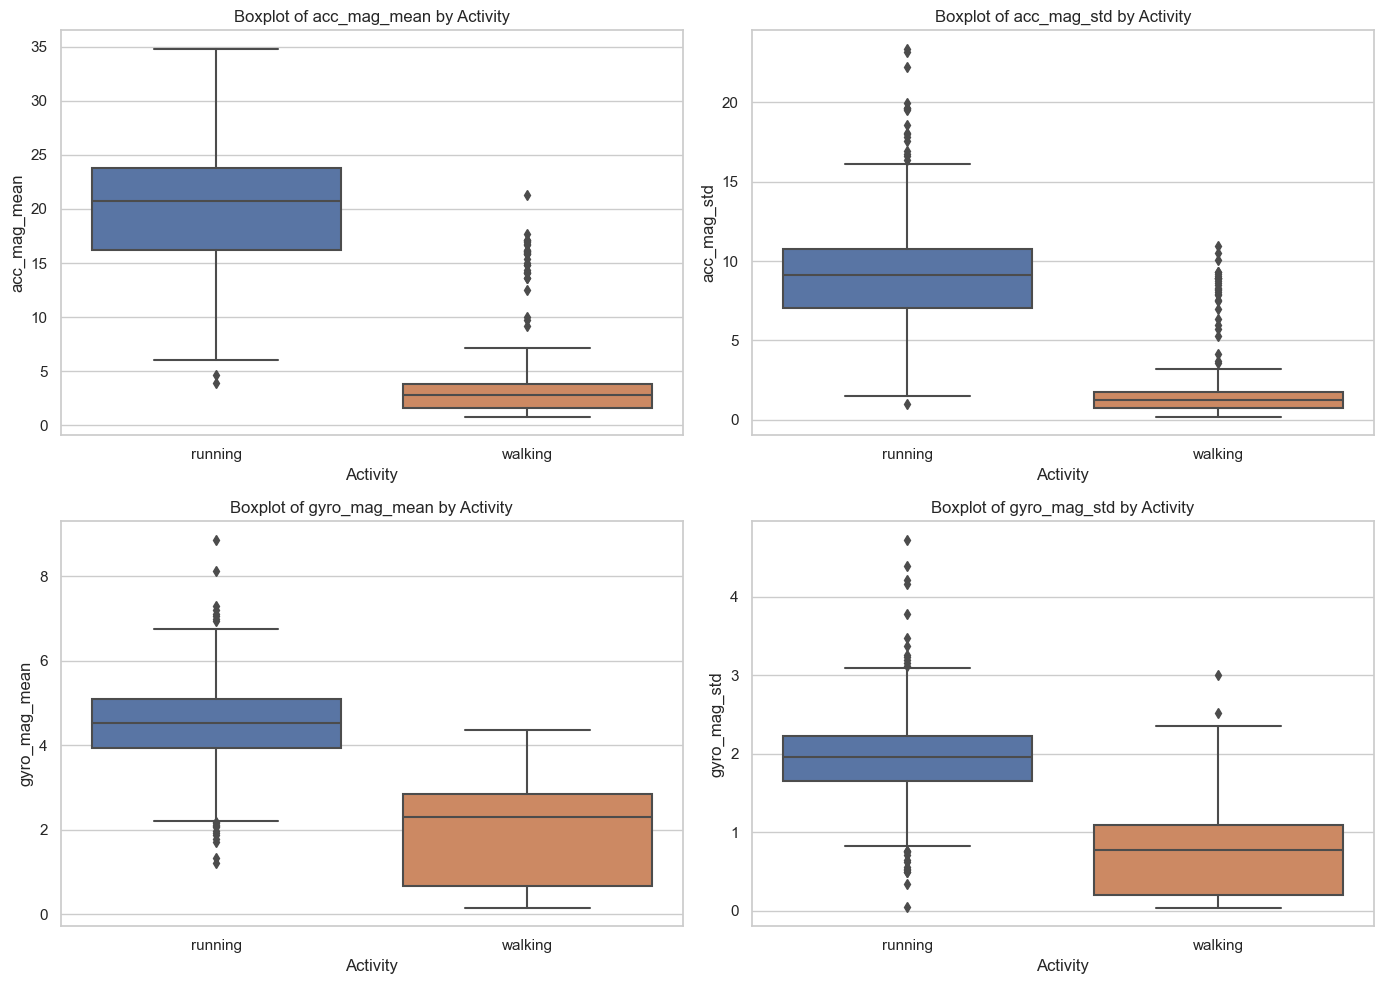

In [51]:
# Restore correct label column name
agg_features.rename(columns={"Label_": "Label"}, inplace=True)

# Create boxplots for selected features
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=agg_features, x="Label", y=feature)
    plt.title(f'Boxplot of {feature} by Activity')
    plt.xlabel("Activity")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()



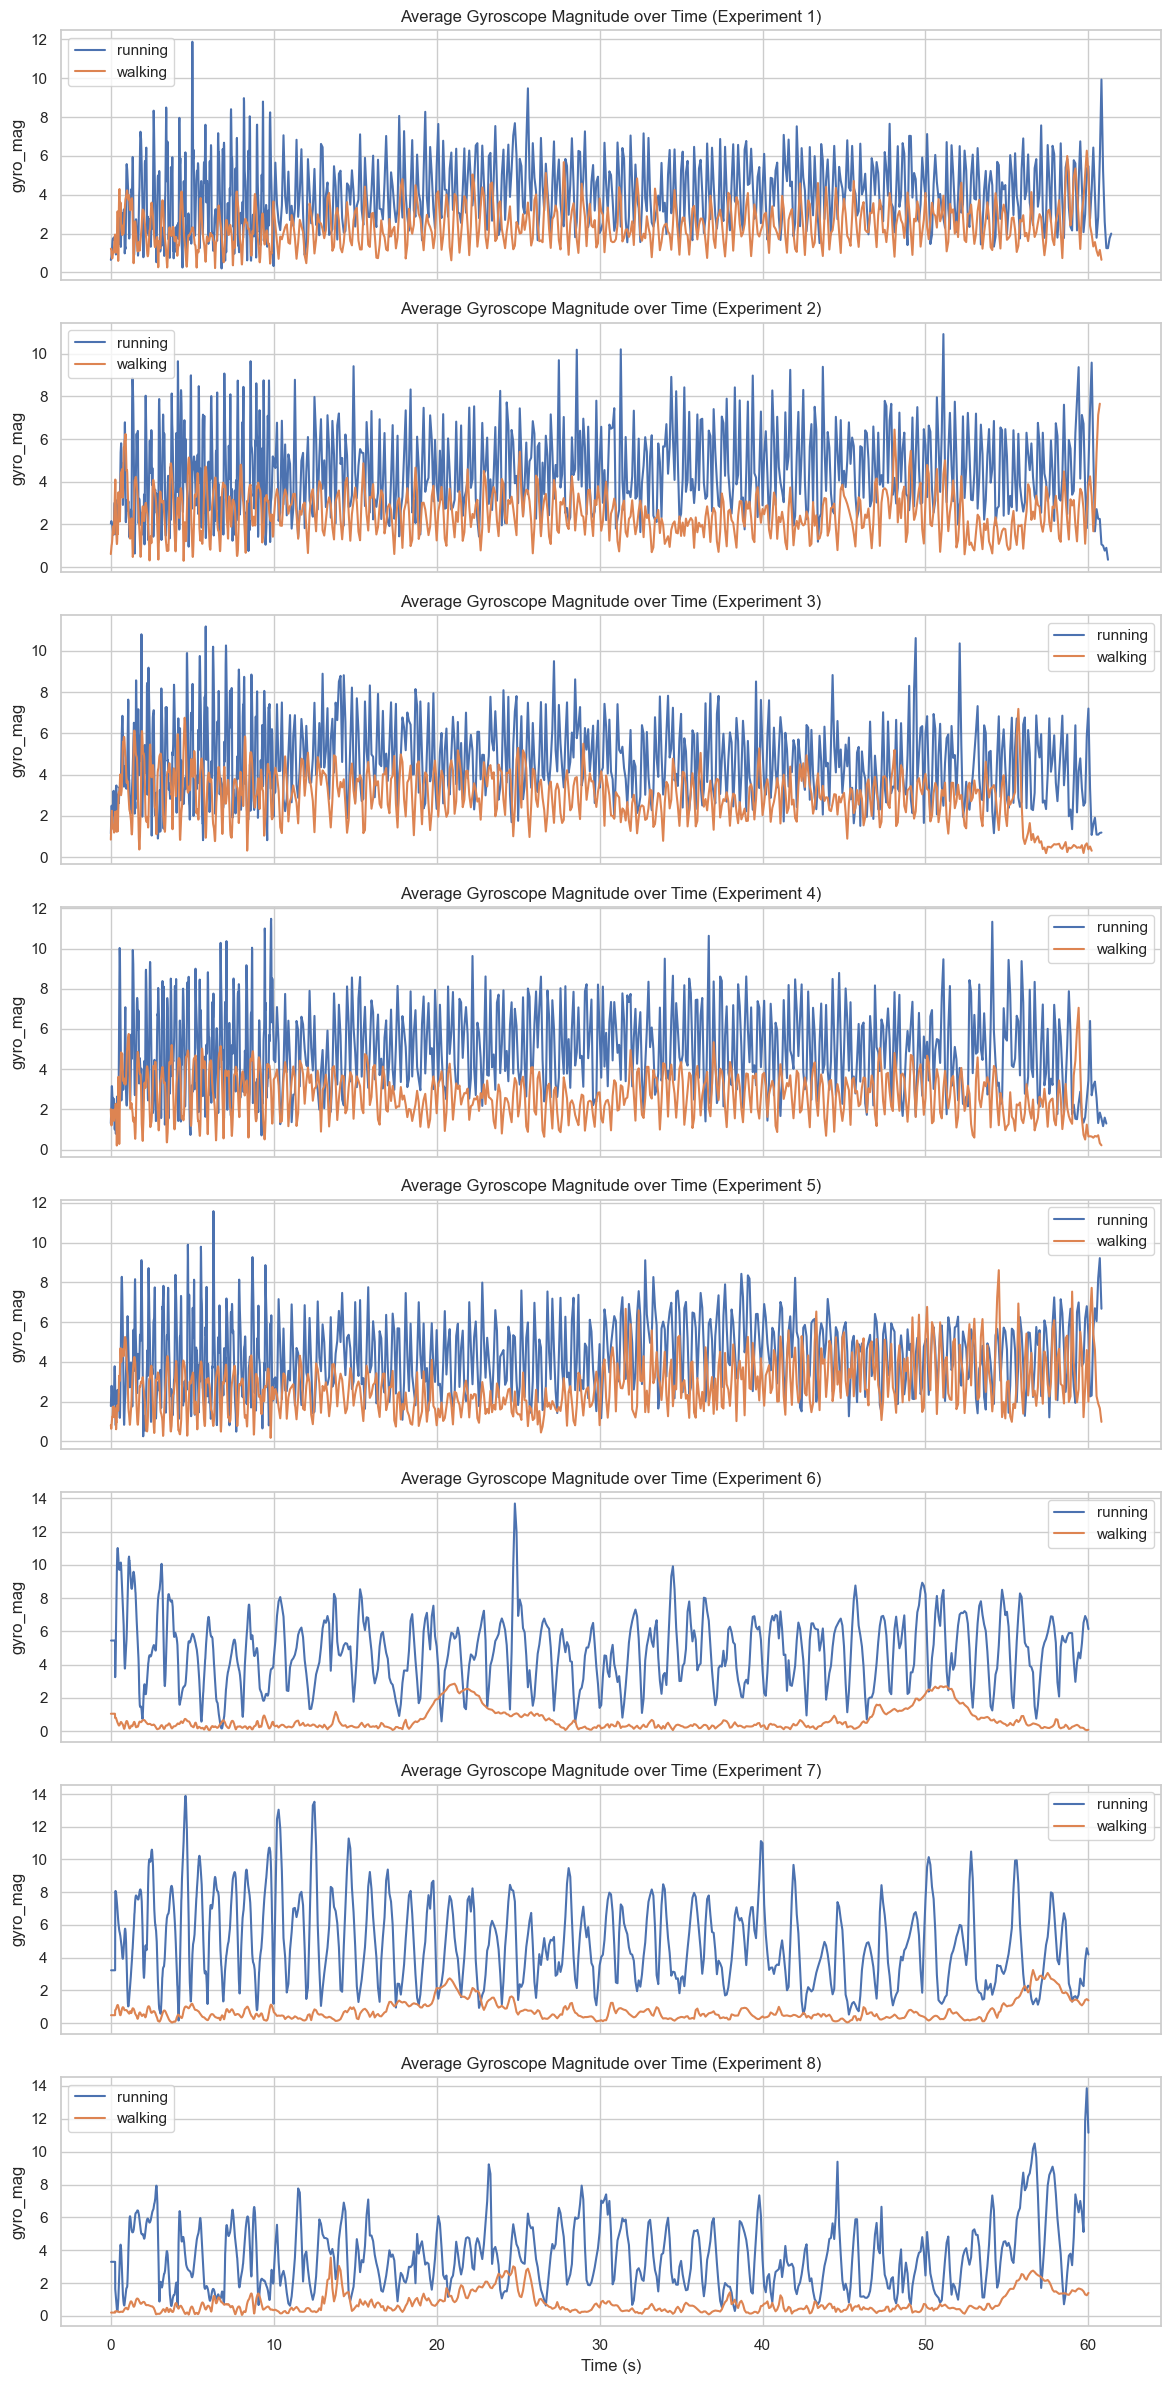

In [52]:
# Create average gyroscope magnitude per time (averaged across all experiments for each activity)
gyro_avg_per_time = combined_df.groupby(["Label", "Experiment", "Time (s)"])["gyro_mag"].mean().reset_index()

# Plot gyroscope magnitude over time per experiment
unique_experiments = sorted(combined_df["Experiment"].unique())
num_experiments = len(unique_experiments)

# Create a subplot for each experiment
fig, axs = plt.subplots(nrows=num_experiments, figsize=(12, 3 * num_experiments), sharex=True)

for i, exp in enumerate(unique_experiments):
    ax = axs[i] if num_experiments > 1 else axs
    for label in gyro_avg_per_time["Label"].unique():
        subset = gyro_avg_per_time[(gyro_avg_per_time["Experiment"] == exp) & (gyro_avg_per_time["Label"] == label)]
        ax.plot(subset["Time (s)"], subset["gyro_mag"], label=label)
    ax.set_title(f"Average Gyroscope Magnitude over Time (Experiment {int(exp)})")
    ax.set_ylabel("gyro_mag")
    ax.legend()

plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()


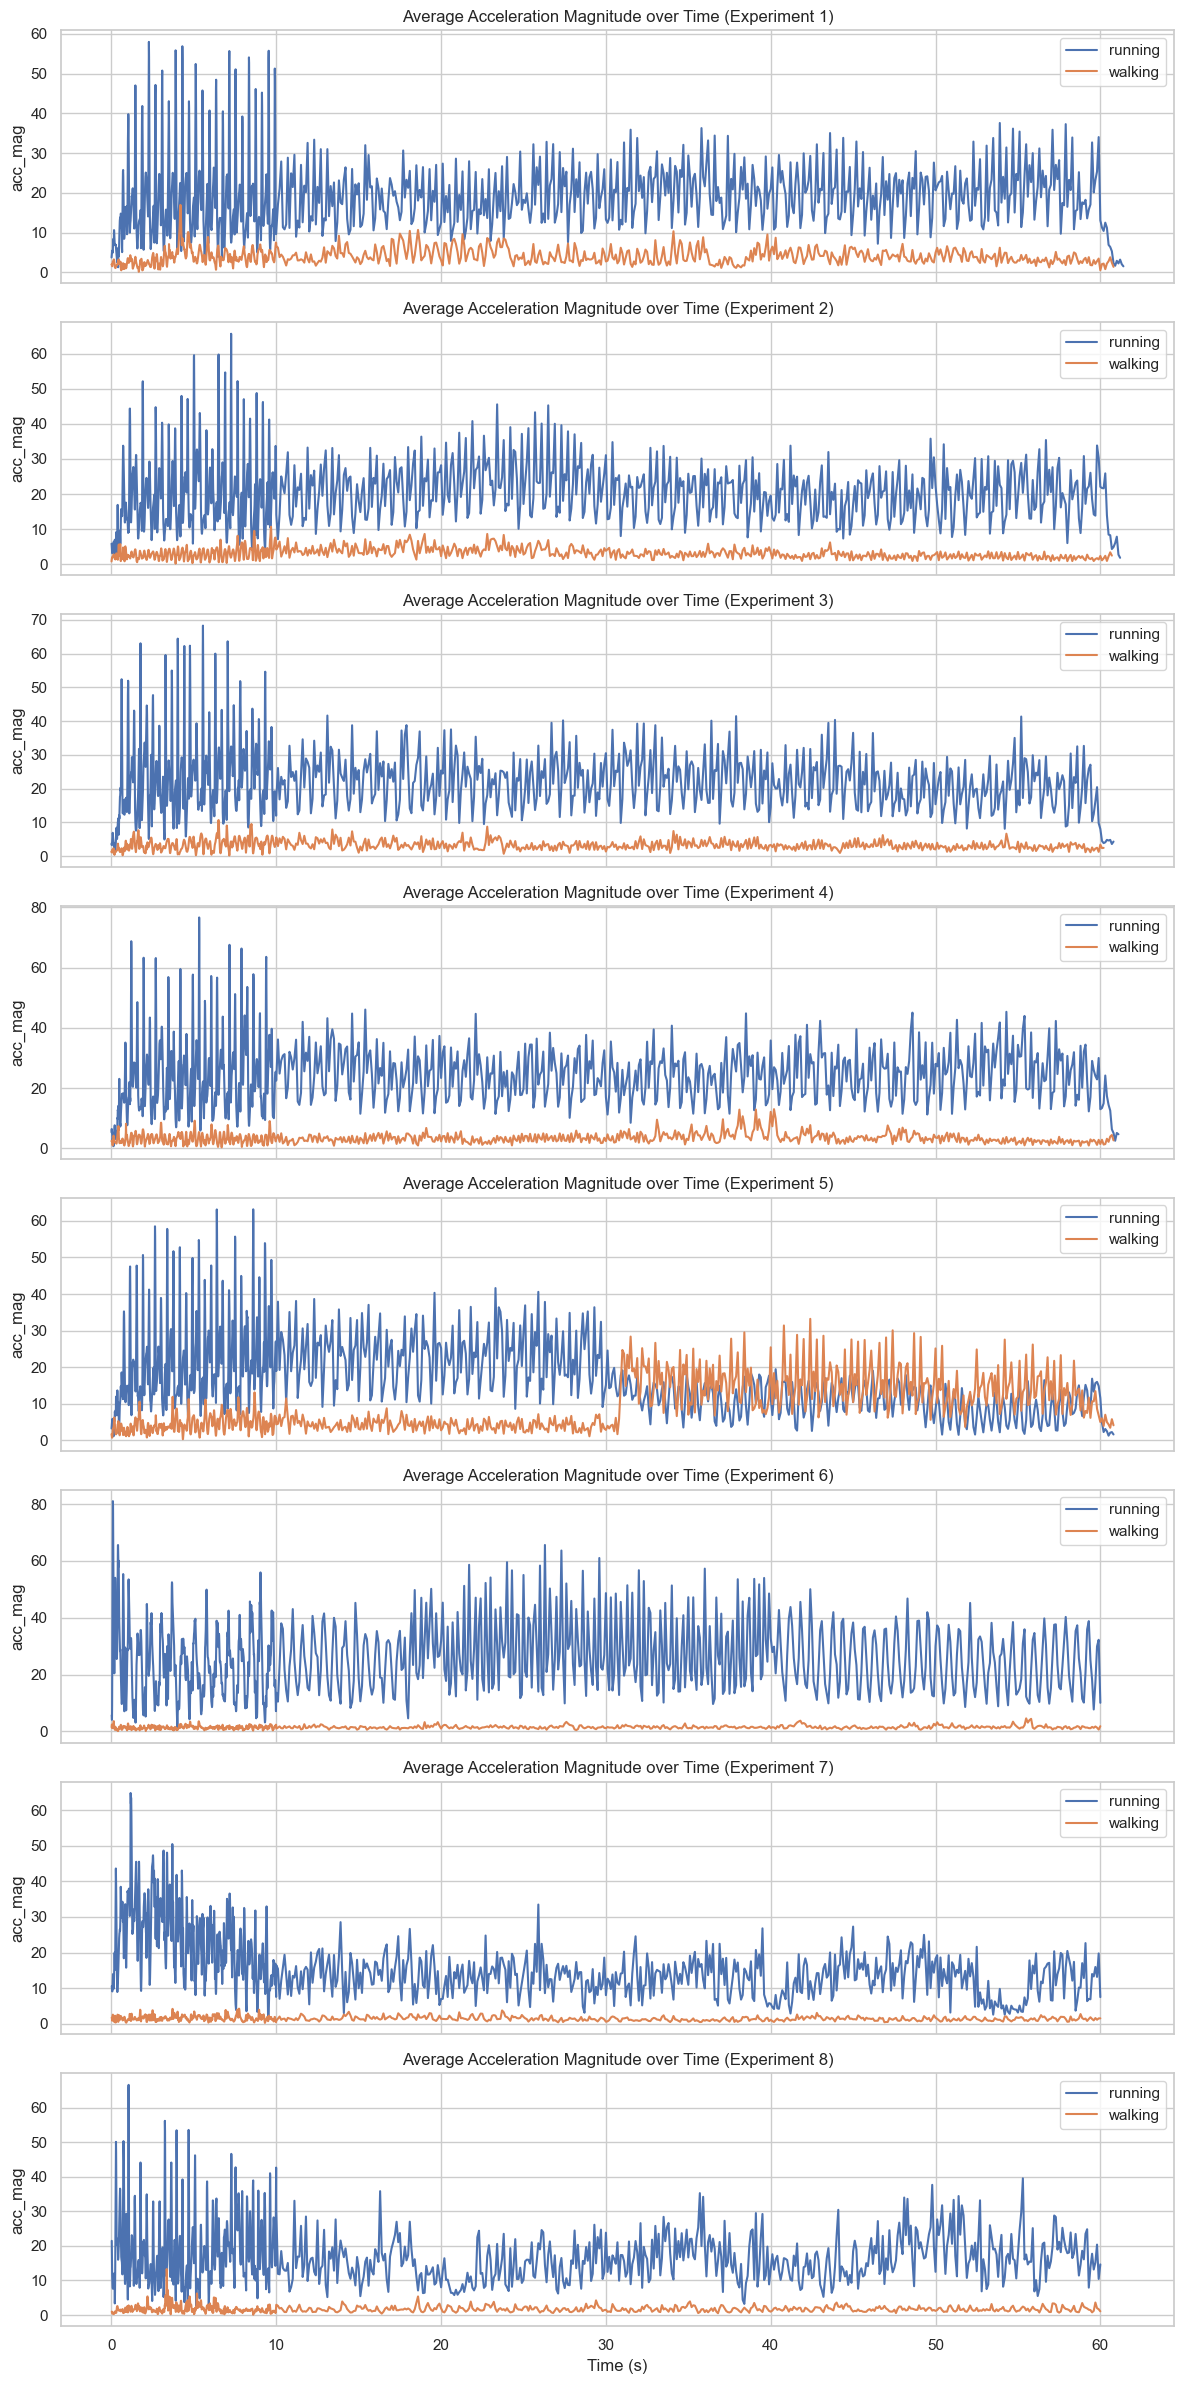

In [53]:
# Compute average acceleration magnitude per time (across experiments and labels)
combined_df["acc_mag"] = np.sqrt(
    combined_df["Linear Acceleration x (m/s^2)"]**2 +
    combined_df["Linear Acceleration y (m/s^2)"]**2 +
    combined_df["Linear Acceleration z (m/s^2)"]**2
)

# Group by label, experiment, and time to compute average acc_mag
acc_avg_per_time = combined_df.groupby(["Label", "Experiment", "Time (s)"])["acc_mag"].mean().reset_index()

# Plot acceleration magnitude over time per experiment
fig, axs = plt.subplots(nrows=num_experiments, figsize=(12, 3 * num_experiments), sharex=True)

for i, exp in enumerate(unique_experiments):
    ax = axs[i] if num_experiments > 1 else axs
    for label in acc_avg_per_time["Label"].unique():
        subset = acc_avg_per_time[(acc_avg_per_time["Experiment"] == exp) & (acc_avg_per_time["Label"] == label)]
        ax.plot(subset["Time (s)"], subset["acc_mag"], label=label)
    ax.set_title(f"Average Acceleration Magnitude over Time (Experiment {int(exp)})")
    ax.set_ylabel("acc_mag")
    ax.legend()

plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()


<Axes: xlabel='acc_mag_mean', ylabel='Count'>

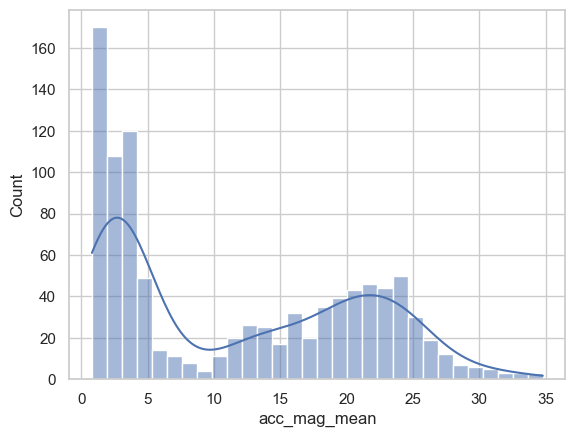

In [55]:
sns.histplot(data=agg_features, x="acc_mag_mean", bins=30, kde=True)


<Axes: xlabel='acc_mag_mean', ylabel='acc_mag_std'>

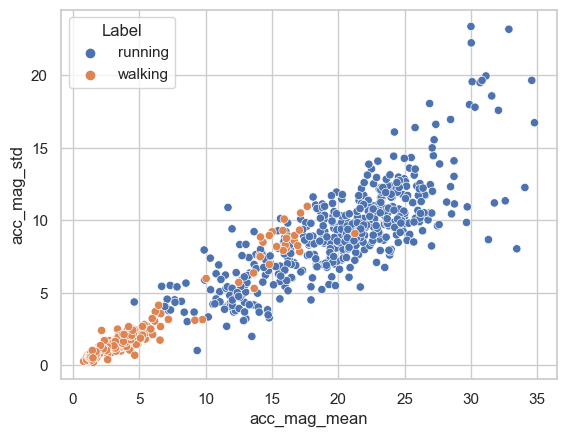

In [56]:
sns.scatterplot(data=agg_features, x="acc_mag_mean", y="acc_mag_std", hue="Label")
